# 十分钟入门pandas

In [160]:
#coding:utf8
%matplotlib inline

这个一篇针对pandas新手的简短入门，想要了解更多复杂的内容，参阅[*Cookbook*](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

通常，我们首先要导入以下几个库：

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

通过传递一个list来创建**Series**，pandas会默认创建整型索引：

In [162]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy array，日期索引以及列标签来创建一个**DataFrame**：

In [163]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [164]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df
# numpy.random.randn(d0,d1,…,dn)
# randn函数返回一个或一组样本，具有标准正态分布。
# dn表格每个维度
# 返回值为指定维度的array

,A,B,C,D
2013-01-01,-0.009160,-2.317355,0.572089,0.103385
2013-01-02,1.224269,1.829806,0.101601,-1.360831
2013-01-03,0.754212,1.136304,0.518759,-0.036557
2013-01-04,0.253204,0.412643,-2.423682,0.439095
2013-01-05,0.041334,0.220035,-0.727627,1.512881
2013-01-06,-1.068748,0.624478,-1.164787,-1.096772


通过传递一个能够被转换为类似series的dict对象来创建一个**DataFrame**:

In [165]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3]*4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


可以看到各列的数据类型为：

In [166]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 查看数据

查看frame中头部和尾部的几行：

In [167]:
df.head()

,A,B,C,D
2013-01-01,-0.009160,-2.317355,0.572089,0.103385
2013-01-02,1.224269,1.829806,0.101601,-1.360831
2013-01-03,0.754212,1.136304,0.518759,-0.036557
2013-01-04,0.253204,0.412643,-2.423682,0.439095
2013-01-05,0.041334,0.220035,-0.727627,1.512881


In [168]:
df.tail(3)

,A,B,C,D
2013-01-04,0.253204,0.412643,-2.423682,0.439095
2013-01-05,0.041334,0.220035,-0.727627,1.512881
2013-01-06,-1.068748,0.624478,-1.164787,-1.096772


显示索引、列名以及底层的numpy数据

In [169]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [170]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [171]:
df.values

array([[-0.00915964, -2.31735475,  0.57208908,  0.10338471],
       [ 1.22426879,  1.8298064 ,  0.10160112, -1.36083147],
       [ 0.7542121 ,  1.13630353,  0.5187594 , -0.03655725],
       [ 0.25320356,  0.41264331, -2.42368193,  0.43909472],
       [ 0.04133391,  0.22003514, -0.72762713,  1.51288077],
       [-1.06874824,  0.62447845, -1.16478671, -1.09677187]])

describe()能对数据做一个快速统计汇总

In [172]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.199185,0.317652,-0.520608,-0.073133
std,0.779455,1.415115,1.161114,1.050363
min,-1.068748,-2.317355,-2.423682,-1.360831
25%,0.003464,0.268187,-1.055497,-0.831718
50%,0.147269,0.518561,-0.313013,0.033414
75%,0.628960,1.008347,0.414470,0.355167
max,1.224269,1.829806,0.572089,1.512881


对数据做转置：

In [173]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.009160,1.224269,0.754212,0.253204,0.041334,-1.068748
B,-2.317355,1.829806,1.136304,0.412643,0.220035,0.624478
C,0.572089,0.101601,0.518759,-2.423682,-0.727627,-1.164787
D,0.103385,-1.360831,-0.036557,0.439095,1.512881,-1.096772


按轴进行排序：

In [174]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.103385,0.572089,-2.317355,-0.009160
2013-01-02,-1.360831,0.101601,1.829806,1.224269
2013-01-03,-0.036557,0.518759,1.136304,0.754212
2013-01-04,0.439095,-2.423682,0.412643,0.253204
2013-01-05,1.512881,-0.727627,0.220035,0.041334
2013-01-06,-1.096772,-1.164787,0.624478,-1.068748


按值进行排序 :

In [175]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.009160,-2.317355,0.572089,0.103385
2013-01-05,0.041334,0.220035,-0.727627,1.512881
2013-01-04,0.253204,0.412643,-2.423682,0.439095
2013-01-06,-1.068748,0.624478,-1.164787,-1.096772
2013-01-03,0.754212,1.136304,0.518759,-0.036557
2013-01-02,1.224269,1.829806,0.101601,-1.360831


# 数据选择

注意：虽然标准的Python/Numpy的表达式能完成选择与赋值等功能，但我们仍推荐使用优化过的pandas数据访问方法：.at，.iat，.loc，.iloc和.ix

## 选取

选择某一列数据，它会返回一个**Series**，等同于**df.A**：

In [176]:
df['A']

2013-01-01   -0.009160
2013-01-02    1.224269
2013-01-03    0.754212
2013-01-04    0.253204
2013-01-05    0.041334
2013-01-06   -1.068748
Freq: D, Name: A, dtype: float64

通过使用**[ ]**进行切片选取：

In [177]:
df[0:3]

,A,B,C,D
2013-01-01,-0.009160,-2.317355,0.572089,0.103385
2013-01-02,1.224269,1.829806,0.101601,-1.360831
2013-01-03,0.754212,1.136304,0.518759,-0.036557


In [178]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.224269,1.829806,0.101601,-1.360831
2013-01-03,0.754212,1.136304,0.518759,-0.036557
2013-01-04,0.253204,0.412643,-2.423682,0.439095


## 通过标签选取

通过标签进行交叉选取：

In [179]:
df.loc[dates[0]]

A   -0.009160
B   -2.317355
C    0.572089
D    0.103385
Name: 2013-01-01 00:00:00, dtype: float64

使用标签对多个轴进行选取

In [180]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.009160,-2.317355
2013-01-02,1.224269,1.829806
2013-01-03,0.754212,1.136304
2013-01-04,0.253204,0.412643
2013-01-05,0.041334,0.220035
2013-01-06,-1.068748,0.624478


In [181]:
df.loc[:,['A','B']][:3]

,A,B
2013-01-01,-0.009160,-2.317355
2013-01-02,1.224269,1.829806
2013-01-03,0.754212,1.136304


进行标签切片，包含两个端点

In [182]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.224269,1.829806
2013-01-03,0.754212,1.136304
2013-01-04,0.253204,0.412643


对于返回的对象进行降维处理

In [183]:
df.loc['20130102',['A','B']]

A    1.224269
B    1.829806
Name: 2013-01-02 00:00:00, dtype: float64

获取一个标量

In [184]:
df.loc[dates[0],'A']

-0.009159638728529776

快速获取标量（与上面的方法等价）

In [185]:
df.at[dates[0],'A']

-0.009159638728529776

## 通过位置选取

通过传递整型的位置进行选取

In [186]:
df.iloc[3]

A    0.253204
B    0.412643
C   -2.423682
D    0.439095
Name: 2013-01-04 00:00:00, dtype: float64

通过整型的位置切片进行选取，与python/numpy形式相同

In [187]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.253204,0.412643
2013-01-05,0.041334,0.220035


只对行进行切片

In [188]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.224269,1.829806,0.101601,-1.360831
2013-01-03,0.754212,1.136304,0.518759,-0.036557


只对列进行切片

In [189]:
df.iloc[:,1:3]

,B,C
2013-01-01,-2.317355,0.572089
2013-01-02,1.829806,0.101601
2013-01-03,1.136304,0.518759
2013-01-04,0.412643,-2.423682
2013-01-05,0.220035,-0.727627
2013-01-06,0.624478,-1.164787


只获取某个值

In [190]:
df.iloc[1,1]

1.8298064041051152

快速获取某个值（与上面的方法等价）

In [191]:
df.iat[1,1]

1.8298064041051152

## 布尔索引

用某列的值来选取数据

In [192]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.224269,1.829806,0.101601,-1.360831
2013-01-03,0.754212,1.136304,0.518759,-0.036557
2013-01-04,0.253204,0.412643,-2.423682,0.439095
2013-01-05,0.041334,0.220035,-0.727627,1.512881


用**where**操作来选取数据

In [193]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.572089,0.103385
2013-01-02,1.224269,1.829806,0.101601,NaN
2013-01-03,0.754212,1.136304,0.518759,NaN
2013-01-04,0.253204,0.412643,NaN,0.439095
2013-01-05,0.041334,0.220035,NaN,1.512881
2013-01-06,NaN,0.624478,NaN,NaN


用**isin()**方法来过滤数据

In [194]:
df2 = df.copy()

In [195]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.009160,-2.317355,0.572089,0.103385,one
2013-01-02,1.224269,1.829806,0.101601,-1.360831,one
2013-01-03,0.754212,1.136304,0.518759,-0.036557,two
2013-01-04,0.253204,0.412643,-2.423682,0.439095,three
2013-01-05,0.041334,0.220035,-0.727627,1.512881,four
2013-01-06,-1.068748,0.624478,-1.164787,-1.096772,three


In [196]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.754212,1.136304,0.518759,-0.036557,two
2013-01-05,0.041334,0.220035,-0.727627,1.512881,four


## 赋值

赋值一个新的列，通过索引来自动对齐数据

In [197]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [198]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.009160,-2.317355,0.572089,0.103385,NaN
2013-01-02,1.224269,1.829806,0.101601,-1.360831,1.0
2013-01-03,0.754212,1.136304,0.518759,-0.036557,2.0
2013-01-04,0.253204,0.412643,-2.423682,0.439095,3.0
2013-01-05,0.041334,0.220035,-0.727627,1.512881,4.0
2013-01-06,-1.068748,0.624478,-1.164787,-1.096772,5.0


通过标签赋值

In [199]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-2.317355,0.572089,0.103385,NaN
2013-01-02,1.224269,1.829806,0.101601,-1.360831,1.0
2013-01-03,0.754212,1.136304,0.518759,-0.036557,2.0
2013-01-04,0.253204,0.412643,-2.423682,0.439095,3.0
2013-01-05,0.041334,0.220035,-0.727627,1.512881,4.0
2013-01-06,-1.068748,0.624478,-1.164787,-1.096772,5.0


通过位置赋值

In [200]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.572089,0.103385,NaN
2013-01-02,1.224269,1.829806,0.101601,-1.360831,1.0
2013-01-03,0.754212,1.136304,0.518759,-0.036557,2.0
2013-01-04,0.253204,0.412643,-2.423682,0.439095,3.0
2013-01-05,0.041334,0.220035,-0.727627,1.512881,4.0
2013-01-06,-1.068748,0.624478,-1.164787,-1.096772,5.0


通过传递numpy array赋值

In [201]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.572089,5,NaN
2013-01-02,1.224269,1.829806,0.101601,5,1.0
2013-01-03,0.754212,1.136304,0.518759,5,2.0
2013-01-04,0.253204,0.412643,-2.423682,5,3.0
2013-01-05,0.041334,0.220035,-0.727627,5,4.0
2013-01-06,-1.068748,0.624478,-1.164787,5,5.0


通过**where**操作来赋值

In [202]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.572089,-5,NaN
2013-01-02,-1.224269,-1.829806,-0.101601,-5,-1.0
2013-01-03,-0.754212,-1.136304,-0.518759,-5,-2.0
2013-01-04,-0.253204,-0.412643,-2.423682,-5,-3.0
2013-01-05,-0.041334,-0.220035,-0.727627,-5,-4.0
2013-01-06,-1.068748,-0.624478,-1.164787,-5,-5.0


# 缺失值处理

在pandas中，用**np.nan**来代表缺失值，这些值默认不会参与运算。

reindex()允许你修改、增加、删除指定轴上的索引，并返回一个数据副本。

In [203]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.572089,5,NaN,1.0
2013-01-02,1.224269,1.829806,0.101601,5,1.0,1.0
2013-01-03,0.754212,1.136304,0.518759,5,2.0,NaN
2013-01-04,0.253204,0.412643,-2.423682,5,3.0,NaN


剔除所有包含缺失值的行数据

In [204]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.224269,1.829806,0.101601,5,1.0,1.0


填充缺失值

In [205]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.572089,5,5.0,1.0
2013-01-02,1.224269,1.829806,0.101601,5,1.0,1.0
2013-01-03,0.754212,1.136304,0.518759,5,2.0,5.0
2013-01-04,0.253204,0.412643,-2.423682,5,3.0,5.0


获取值是否为**nan**的布尔标记

In [206]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 运算

## 统计

运算过程中，通常不包含缺失值。

进行描述性统计

In [207]:
df.mean()

A    0.200712
B    0.703878
C   -0.520608
D    5.000000
F    3.000000
dtype: float64

对其他轴进行同样的运算

In [208]:
df.mean(1)

2013-01-01    1.393022
2013-01-02    1.831135
2013-01-03    1.881855
2013-01-04    1.248433
2013-01-05    1.706748
2013-01-06    1.678189
Freq: D, dtype: float64

对于拥有不同维度的对象进行运算时需要对齐。除此之外，pandas会自动沿着指定维度计算。

In [209]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [210]:
df.sub(s, axis='index')
# 对不同维度的pandas对象进行减法操作

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.245788,0.136304,-0.481241,4.0,1.0
2013-01-04,-2.746796,-2.587357,-5.423682,2.0,0.0
2013-01-05,-4.958666,-4.779965,-5.727627,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply 函数作用

通过apply()对函数作用

In [211]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.572089,5,NaN
2013-01-02,1.224269,1.829806,0.673690,10,1.0
2013-01-03,1.978481,2.966110,1.192450,15,3.0
2013-01-04,2.231684,3.378753,-1.231232,20,6.0
2013-01-05,2.273018,3.598788,-1.958859,25,10.0
2013-01-06,1.204270,4.223267,-3.123646,30,15.0


In [212]:
df.apply(lambda x:x.max()-x.min())

A    2.293017
B    1.829806
C    2.995771
D    0.000000
F    4.000000
dtype: float64

## 频数统计

In [213]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    1
3    6
4    5
5    4
6    5
7    5
8    6
9    3
dtype: int32

In [214]:
s.value_counts()

5    3
6    2
1    2
4    1
3    1
0    1
dtype: int64

## 字符串方法

对于Series对象，在其str属性中有着一系列的字符串处理方法。就如同下段代码一样，能很方便的对array中各个元素进行运算。值得注意的是，在str属性中的模式匹配默认使用正则表达式。

In [215]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()  # 全部小写

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并

## Concat 连接

pandas中提供了大量的方法能够轻松对Series，DataFrame和Panel对象进行各种满足逻辑关系的合并操作

通过**concat()**来连接pandas对象

In [216]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.008249,-1.931497,1.298090,-1.676125
1,-1.914991,0.927429,0.144681,-0.660144
2,2.059409,1.008589,0.903592,0.950643
3,-2.202536,0.151183,0.665803,0.408061
4,2.174101,0.739597,-0.552231,2.441734
5,0.080842,-0.062529,-0.563134,-0.590235
6,-0.479031,1.752429,0.746281,0.413978
7,-0.828223,0.675273,0.738228,0.094891
8,1.141790,-1.553787,0.013230,-0.072241
9,-0.472944,0.382603,0.821592,-2.898321


In [217]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.008249 -1.931497  1.298090 -1.676125
 1 -1.914991  0.927429  0.144681 -0.660144
 2  2.059409  1.008589  0.903592  0.950643,
           0         1         2         3
 3 -2.202536  0.151183  0.665803  0.408061
 4  2.174101  0.739597 -0.552231  2.441734
 5  0.080842 -0.062529 -0.563134 -0.590235
 6 -0.479031  1.752429  0.746281  0.413978,
           0         1         2         3
 7 -0.828223  0.675273  0.738228  0.094891
 8  1.141790 -1.553787  0.013230 -0.072241
 9 -0.472944  0.382603  0.821592 -2.898321]

In [218]:
pd.concat(pieces)

,0,1,2,3
0,-0.008249,-1.931497,1.298090,-1.676125
1,-1.914991,0.927429,0.144681,-0.660144
2,2.059409,1.008589,0.903592,0.950643
3,-2.202536,0.151183,0.665803,0.408061
4,2.174101,0.739597,-0.552231,2.441734
5,0.080842,-0.062529,-0.563134,-0.590235
6,-0.479031,1.752429,0.746281,0.413978
7,-0.828223,0.675273,0.738228,0.094891
8,1.141790,-1.553787,0.013230,-0.072241
9,-0.472944,0.382603,0.821592,-2.898321


## Join 合并

类似于SQL中的合并(merge)

In [219]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [220]:
right = pd.DataFrame({'key':['foo', 'foo'], 'lval':[4,5]})
right

,key,lval
0,foo,4
1,foo,5


In [221]:
pd.merge(left, right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append 添加

将若干行添加到dataFrame后面

In [222]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.104939,0.402226,-0.902272,-0.825333
1,-1.413076,-0.070676,0.419547,0.397155
2,0.775150,0.671860,-0.384183,0.548472
3,-0.701328,-0.664880,0.216948,0.268819
4,1.783016,-0.446556,0.090053,0.601712
5,-1.235488,0.267321,0.577800,0.622512
6,0.174386,1.122416,-0.319396,0.384177
7,0.379161,-0.969254,-0.012698,0.335955


In [223]:
s = df.iloc[3]
s

A   -0.701328
B   -0.664880
C    0.216948
D    0.268819
Name: 3, dtype: float64

In [224]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.104939,0.402226,-0.902272,-0.825333
1,-1.413076,-0.070676,0.419547,0.397155
2,0.775150,0.671860,-0.384183,0.548472
3,-0.701328,-0.664880,0.216948,0.268819
4,1.783016,-0.446556,0.090053,0.601712
5,-1.235488,0.267321,0.577800,0.622512
6,0.174386,1.122416,-0.319396,0.384177
7,0.379161,-0.969254,-0.012698,0.335955
8,-0.701328,-0.664880,0.216948,0.268819


# 分组

对于“group by”操作，我们通常是指以下一个或几个步骤：
* **划分** 按照某些标准将数据分为不同的组
* **应用** 对每组数据分别执行一个函数
* **组合** 将结果组合到一个数据结构

In [225]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.074295,0.211088
1,bar,one,-0.388488,0.158549
2,foo,two,-0.735871,0.031331
3,bar,three,0.736755,1.958789
4,foo,two,-1.239575,-0.290889
5,bar,two,0.067704,0.445248
6,foo,one,-0.100590,0.702553
7,bar,three,-0.513245,0.962950


分组并对每个分组应用sum函数

In [226]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.097274,3.525537
foo,-2.001741,0.654083


按多个列分组形成层级索引，然后应用函数

In [227]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.388488  0.158549
    three  0.223510  2.921739
    two    0.067704  0.445248
foo one   -0.026295  0.913641
    two   -1.975446 -0.259558

# 变形

## 堆叠

In [228]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print(tuples)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


In [229]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(index)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])


In [230]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print(df)

                     A         B
first second                    
bar   one     1.187263  1.060822
      two    -0.470101 -1.366367
baz   one    -0.662567 -0.428654
      two     0.102700  0.810791
foo   one    -0.763112  0.917643
      two     0.260601  0.367383
qux   one    -2.510441  0.536856
      two     1.091549  1.557190


In [231]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.187263  1.060822
      two    -0.470101 -1.366367
baz   one    -0.662567 -0.428654
      two     0.102700  0.810791

**stack()**方法对DataFrame的列“压缩”一个层级

In [232]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.187263
               B    1.060822
       two     A   -0.470101
               B   -1.366367
baz    one     A   -0.662567
               B   -0.428654
       two     A    0.102700
               B    0.810791
dtype: float64

对于一个“堆叠过的”DataFrame或者Series（拥有MultiIndex作为索引），**stack()**的逆操作是**unstack()**，默认反堆叠到上一个层级

In [233]:
stacked.unstack()

A         B
first second                    
bar   one     1.187263  1.060822
      two    -0.470101 -1.366367
baz   one    -0.662567 -0.428654
      two     0.102700  0.810791

In [234]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.187263 -0.470101
      B  1.060822 -1.366367
baz   A -0.662567  0.102700
      B -0.428654  0.810791

In [235]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.187263 -0.662567
       B  1.060822 -0.428654
two    A -0.470101  0.102700
       B -1.366367  0.810791

## 数据透视表

In [236]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.218115,0.457226
1,one,B,foo,0.259709,0.214245
2,two,C,foo,0.074936,-0.827225
3,three,A,bar,-0.167538,-1.323216
4,one,B,bar,-1.949377,-0.462245
5,one,C,bar,-0.399822,-1.534710
6,two,A,foo,0.126560,0.265965
7,three,B,foo,0.225438,0.074880
8,one,C,foo,1.306773,0.654225
9,one,A,bar,0.301199,0.044984


 我们可以轻松地从这个数据得到透视表

In [237]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.301199  0.218115
      B -1.949377  0.259709
      C -0.399822  1.306773
three A -0.167538       NaN
      B       NaN  0.225438
      C -0.470028       NaN
two   A       NaN  0.126560
      B  0.928924       NaN
      C       NaN  0.074936

# 时间序列

pandas在对频率转换进行重新采样时拥有着简单，强大而且高效的功能（例如把按秒采样的数据转换为按5分钟采样的数据）。这在金融领域很常见，但又不限于此。

In [238]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [239]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    475
2012-01-01 00:00:01    386
2012-01-01 00:00:02     62
2012-01-01 00:00:03    396
2012-01-01 00:00:04    260
                      ... 
2012-01-01 00:01:35    352
2012-01-01 00:01:36    262
2012-01-01 00:01:37    397
2012-01-01 00:01:38    497
2012-01-01 00:01:39    250
Freq: S, Length: 100, dtype: int32

In [240]:
#ts.resample('5Min', how='sum') # 函数resample的‘how’参数已经不适用了，可以将resample(how='last')改成resample.last()的形式
ts.resample('5Min').last()

2012-01-01    250
Freq: 5T, dtype: int32

时区表示

In [241]:
rng = pd.date_range('3/6/2012', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [242]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06   -0.146340
2012-03-07   -0.610343
2012-03-08   -1.064875
2012-03-09    0.318556
2012-03-10   -1.373823
Freq: D, dtype: float64

In [243]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.146340
2012-03-07 00:00:00+00:00   -0.610343
2012-03-08 00:00:00+00:00   -1.064875
2012-03-09 00:00:00+00:00    0.318556
2012-03-10 00:00:00+00:00   -1.373823
Freq: D, dtype: float64

时区转换

In [244]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.146340
2012-03-06 19:00:00-05:00   -0.610343
2012-03-07 19:00:00-05:00   -1.064875
2012-03-08 19:00:00-05:00    0.318556
2012-03-09 19:00:00-05:00   -1.373823
Freq: D, dtype: float64

时间跨度转换

In [245]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [246]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.451152
2012-02-29    0.812693
2012-03-31   -0.738444
2012-04-30    0.047256
2012-05-31    1.995662
Freq: M, dtype: float64

In [247]:
ps = ts.to_period()
ps

2012-01   -0.451152
2012-02    0.812693
2012-03   -0.738444
2012-04    0.047256
2012-05    1.995662
Freq: M, dtype: float64

In [248]:
ps.to_timestamp()

2012-01-01   -0.451152
2012-02-01    0.812693
2012-03-01   -0.738444
2012-04-01    0.047256
2012-05-01    1.995662
Freq: MS, dtype: float64

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据

In [249]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [250]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)
ts

1990Q1   -0.012494
1990Q2   -0.603717
1990Q3    1.010279
1990Q4   -0.904042
1991Q1   -1.397838
1991Q2    1.128739
1991Q3    0.368517
1991Q4    0.697678
1992Q1    0.277826
1992Q2   -0.739097
1992Q3   -0.106739
1992Q4    0.327338
1993Q1   -1.144421
1993Q2   -0.320185
1993Q3    0.111554
1993Q4   -0.804872
1994Q1   -0.103601
1994Q2    1.125731
1994Q3    0.431430
1994Q4    0.803067
1995Q1   -0.099718
1995Q2    0.566918
1995Q3    1.786664
1995Q4    0.572640
1996Q1    0.674764
1996Q2    0.945657
1996Q3   -1.862648
1996Q4    1.683876
1997Q1    0.400131
1997Q2    0.357321
1997Q3    0.289719
1997Q4   -1.492763
1998Q1   -0.148015
1998Q2    0.129982
1998Q3   -2.514578
1998Q4   -0.613287
1999Q1    0.380341
1999Q2    0.204182
1999Q3    0.680247
1999Q4   -0.875300
2000Q1   -0.289511
2000Q2    1.507409
2000Q3   -1.489833
2000Q4   -0.637929
Freq: Q-NOV, dtype: float64

In [251]:
ts.index = (prng.asfreq('M', 'end') ) .asfreq('H', 'start') +9
ts

1990-02-01 09:00   -0.012494
1990-05-01 09:00   -0.603717
1990-08-01 09:00    1.010279
1990-11-01 09:00   -0.904042
1991-02-01 09:00   -1.397838
1991-05-01 09:00    1.128739
1991-08-01 09:00    0.368517
1991-11-01 09:00    0.697678
1992-02-01 09:00    0.277826
1992-05-01 09:00   -0.739097
1992-08-01 09:00   -0.106739
1992-11-01 09:00    0.327338
1993-02-01 09:00   -1.144421
1993-05-01 09:00   -0.320185
1993-08-01 09:00    0.111554
1993-11-01 09:00   -0.804872
1994-02-01 09:00   -0.103601
1994-05-01 09:00    1.125731
1994-08-01 09:00    0.431430
1994-11-01 09:00    0.803067
1995-02-01 09:00   -0.099718
1995-05-01 09:00    0.566918
1995-08-01 09:00    1.786664
1995-11-01 09:00    0.572640
1996-02-01 09:00    0.674764
1996-05-01 09:00    0.945657
1996-08-01 09:00   -1.862648
1996-11-01 09:00    1.683876
1997-02-01 09:00    0.400131
1997-05-01 09:00    0.357321
1997-08-01 09:00    0.289719
1997-11-01 09:00   -1.492763
1998-02-01 09:00   -0.148015
1998-05-01 09:00    0.129982
1998-08-01 09:

# 分类

从版本0.15开始，pandas在**DataFrame**中开始包括分类数据。

In [252]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'e', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,e
5,6,e


把raw_grade转换为分类类型

In [253]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    e
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

重命名类别名为更有意义的名称

In [254]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

对分类重新排序，并添加缺失的分类

In [255]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4     very bad
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

排序是按照分类的顺序进行的，而不是字典序

In [256]:
df.sort_values(by="grade")

,id,raw_grade,grade
4,5,e,very bad
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good


按分类分组时，也会显示空的分类

In [257]:
df.groupby("grade").size()

grade
very bad     2
bad          0
medium       0
good         2
very good    2
dtype: int64

# 绘图

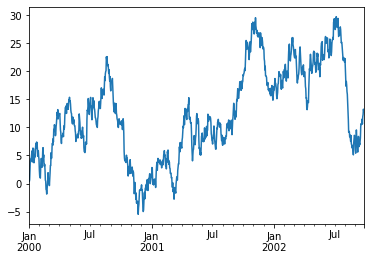

In [258]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

对于DataFrame类型，**plot()**能很方便地画出所有列及其标签

<Figure size 432x288 with 0 Axes>

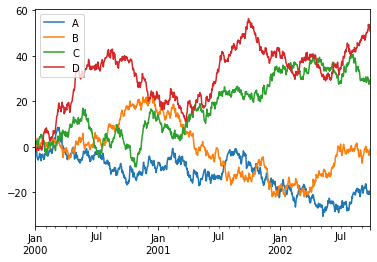

In [259]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# 获取数据的I/O

## CSV

写入一个csv文件

In [260]:
df.to_csv('data/foo.csv')

从一个csv文件读入

In [261]:
pd.read_csv('data/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.355720,0.179674,1.310526,-1.030508
1,2000-01-02,0.542642,-0.512352,1.338015,-1.163884
2,2000-01-03,0.384705,0.079650,1.932428,-1.988978
3,2000-01-04,-0.119408,1.683542,2.580705,-0.828400
4,2000-01-05,-1.280764,1.683320,2.728438,-1.083130
...,...,...,...,...,...
995,2002-09-22,-20.892060,-3.312843,27.543373,52.615466
996,2002-09-23,-20.421434,-3.745712,29.063758,53.126931
997,2002-09-24,-20.803040,-2.491645,29.130925,53.678134
998,2002-09-25,-19.570276,-1.416029,29.365457,52.415291


## HDF5

HDFStores的读写

写入一个HDF5 Store

In [262]:
df.to_hdf('data/foo.h5', 'df')

从一个HDF5 Store读入

In [263]:
pd.read_hdf('data/foo.h5', 'df')

,A,B,C,D
2000-01-01,0.355720,0.179674,1.310526,-1.030508
2000-01-02,0.542642,-0.512352,1.338015,-1.163884
2000-01-03,0.384705,0.079650,1.932428,-1.988978
2000-01-04,-0.119408,1.683542,2.580705,-0.828400
2000-01-05,-1.280764,1.683320,2.728438,-1.083130
...,...,...,...,...
2002-09-22,-20.892060,-3.312843,27.543373,52.615466
2002-09-23,-20.421434,-3.745712,29.063758,53.126931
2002-09-24,-20.803040,-2.491645,29.130925,53.678134
2002-09-25,-19.570276,-1.416029,29.365457,52.415291


## Excel

MS Excel的读写

写入一个Excel文件

In [264]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

从一个excel文件读入

In [265]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.355720,0.179674,1.310526,-1.030508
1,2000-01-02,0.542642,-0.512352,1.338015,-1.163884
2,2000-01-03,0.384705,0.079650,1.932428,-1.988978
3,2000-01-04,-0.119408,1.683542,2.580705,-0.828400
4,2000-01-05,-1.280764,1.683320,2.728438,-1.083130
...,...,...,...,...,...
995,2002-09-22,-20.892060,-3.312843,27.543373,52.615466
996,2002-09-23,-20.421434,-3.745712,29.063758,53.126931
997,2002-09-24,-20.803040,-2.491645,29.130925,53.678134
998,2002-09-25,-19.570276,-1.416029,29.365457,52.415291
